# Task 2
---
Clustering

[Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)

# Dataset description

## Context
__Problem Statement__

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
__Attributes__

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

Target

- Need to perform clustering to summarize customer segments.

# Import required libraries

In [1]:
!pip install --user pandas-profiling

In [2]:
!pip install umap-learn

In [3]:
!pip install sklearn_pandas

In [73]:
!pip install --user yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [255]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from pandas_profiling import ProfileReport

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn_pandas import DataFrameMapper, gen_features

from umap import UMAP

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme()

In [256]:
PALETTE = sns.color_palette("Set2")

In [257]:
sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) 

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) # EDA

# EDA

## First look

In [258]:
data = pd.read_csv('archive/marketing_campaign.csv', sep='\t', 
                   index_col='ID', 
                   parse_dates=['Dt_Customer'])

In [259]:
data.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,...,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,...,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,10,...,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,...,9,0,0,0,0,0,0,3,11,1


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

There are two columns that are not mentioned in dataset decription: `Z_CostCount` and `Z_Revenue`

In [261]:
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [262]:
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

As long as there are only one values in both columns, i can delete them

In [263]:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

## Data related features

I have no idea in which year this dataset was collected, because the dataset creator doesn't provide us with any description 

So let's assume that the dataset was collected on the next day of the last customer enrollment 

In [264]:
print('The last day a client was enrolled is ', data['Dt_Customer'].dt.date.max())

The last day a client was enrolled is  2014-12-06


There are time-connected features: `Year_Birth` and `Dt_Customer`. I will transform `Year_Birth` into `Age` feature by substracting year of birth from 2014. And it also nice to transform datetime feature `Dt_Customer` into integer `Customer_For`, which is the amount of days since customer enrollment

In [265]:
data.insert(1, 'Age', 2014 - data['Year_Birth'])
data.insert(2, 'Customer_For', (np.datetime64('2014-12-07') - data['Dt_Customer']).dt.days)

In [266]:
data.drop(columns=['Dt_Customer', 'Year_Birth'], inplace=True)

__Age distribution__

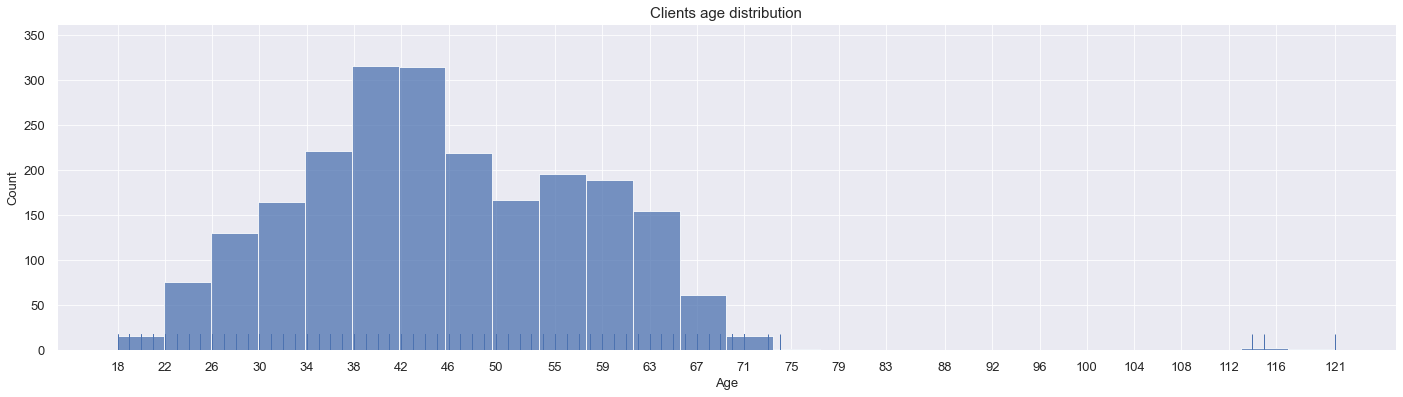

In [267]:
plt.figure(figsize=(24, 6))
plt.title('Clients age distribution')
ax = sns.histplot(data['Age'].sort_values(), bins=26)
sns.rugplot(data=data['Age'], height=.05)
plt.xticks(np.linspace(data['Age'].min(), data['Age'].max(), 26, dtype=int, endpoint = True))
plt.show()

There are really old customers

In [268]:
data.query('Age > 110')

,Age,Customer_For,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
7829,114,437,2n Cycle,Divorced,36640.0,1,0,99,15,6,...,1,2,5,0,0,0,0,0,1,0
11004,121,204,2n Cycle,Single,60182.0,0,1,23,8,0,...,0,2,4,0,0,0,0,0,0,0
1150,115,437,PhD,Together,83532.0,0,0,36,755,144,...,6,4,1,0,0,1,0,0,0,0


Later i will create dataset without outliers for training, but i will predict on the whole set with outliers

## Income

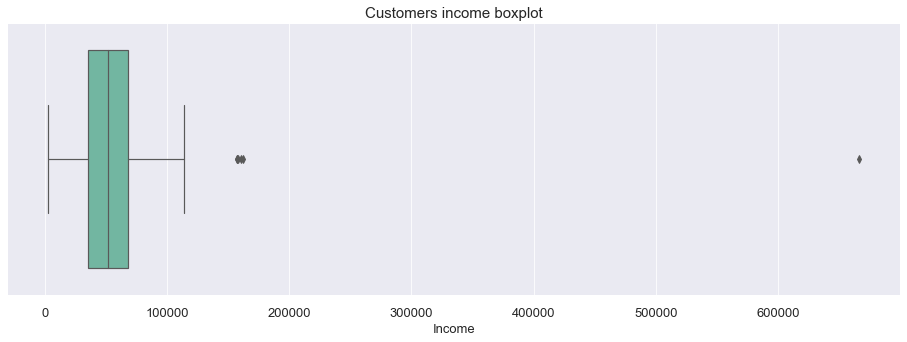

In [520]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income boxplot')
ax = sns.boxplot(data['Income'], palette=PALETTE)
plt.show()

There are some outliers. Let's look on them.

In [278]:
data.query('Income > 140000')

,Age,Customer_For,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
8475,41,338,PhD,Married,157243.0,0,1,98,20,2,...,22,0,0,0,0,0,0,0,0,0
1503,38,641,PhD,Together,162397.0,1,1,31,85,1,...,0,1,1,0,0,0,0,0,0,0
5555,39,158,Bachelor,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,0,0,0,0,0
1501,32,973,PhD,Married,160803.0,0,0,21,55,16,...,28,1,0,0,0,0,0,0,0,0
5336,43,610,Master,Together,157733.0,1,0,37,39,1,...,0,1,1,0,0,0,0,0,0,0
4931,37,587,Bachelor,Together,157146.0,0,0,13,1,0,...,28,0,1,0,0,0,0,0,0,0
11181,65,465,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,0,0,0,0,0
9432,37,669,Bachelor,Together,666666.0,1,0,23,9,14,...,1,3,6,0,0,0,0,0,0,0


### Outliers

There is no reason to consider this data invalid. But while using clutering methods, outliers can negatively affect. So i would drop a customer with 666666 Income, and then we would predict on it 

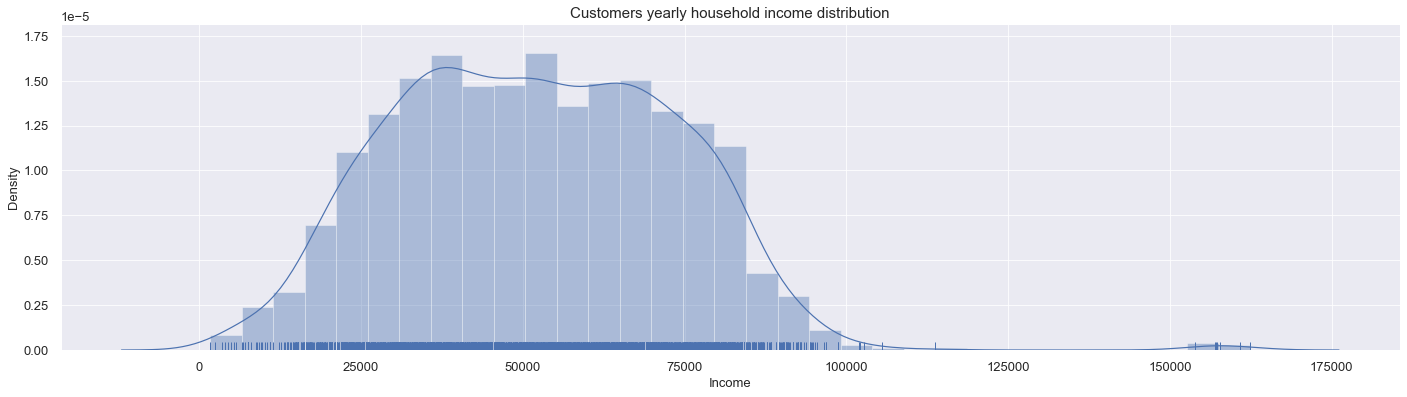

In [329]:
plt.figure(figsize=(24, 6))
plt.title('Customers yearly household income distribution')
ax = sns.distplot(data.query('Income < 500000')['Income'], rug=True)

plt.show()

In [287]:
data['Income'].quantile(0.25)
data['Income'].quantile(0.75)

68522.0

### Filling nulls

In [293]:
print(f'There are {data["Income"].isna().sum()} missing Income values')

There are 0 missing Income values


In [288]:
income_imputer = SimpleImputer(strategy='median')

In [289]:
data['Income'] = income_imputer.transform(data['Income'].values.reshape(-1,1))[:, 0]

## Education

In [294]:
data['Education'].value_counts()

Bachelor    1127
Master       573
PhD          486
Basic         54
Name: Education, dtype: int64

`Graduation` and `2n Cycle` are not clear values. 

> All countries conveyed their national systems to a two cycle structure consisting of a first (undergraduate) and a second (graduate) cycle. _Source:_ [EHEA](http://www.ehea.info/page-three-cycle-system) 

According to three Cycle System from the European Higher Education Area, `2n Cycle` refers to `Master` degree. And `Graduation` means that the person is on the second - graduate cycle, so in fact he finished the first - undergraduate cycle (in many countries labelled `Bachelor`)

So the changes are as follow:
- `2n Cycle` -> `Master`
- `Graduation` -> `Bachelor`

In [295]:
data['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

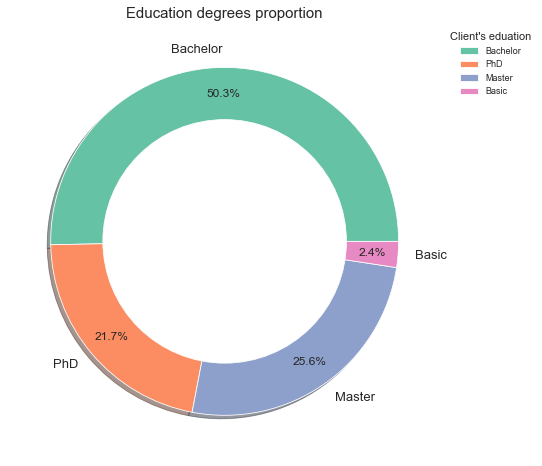

In [296]:
unique_column_labels = data['Education'].unique()
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data.loc[data['Education'] == label].shape[0])

plt.figure(figsize=(12, 8))
plt.title("Education degrees proportion")
plt.pie(sizes, labels=unique_column_labels, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's eduation", labels=unique_column_labels, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Let's see how the Income varies across different education degrees

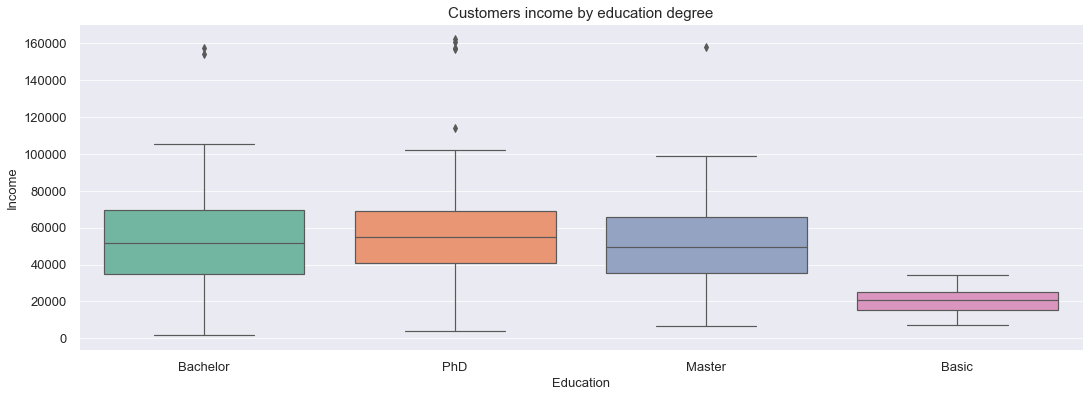

In [328]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=data.query('Income < 500000'), x='Education', y='Income', palette=PALETTE)
plt.title('Customers income by education degree')

plt.show()

Bachelor, PhD and Master degrees Income is around the same, but the Basic degree Income is definetly lower than others

## Marital status

In [301]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

We can merge `Alone` to `Single` category, but `YOLO` and `Absurd` are not clear.

__YOLO__

> YOLO (You only live once) accords to the lifestyle or trend that many young people have adopted as a way to better enjoy life, and not to think about saving up for the future. 

I can assume that `YOLO` category refers to people who do not have a permanent partner, so i will also merge it to `Single`

__Absurd__

> In philosophy, "the Absurd" refers to the conflict between the human tendency to seek inherent value and meaning in life, and the human inability to find these with any certainty.

So i would also merge `Absurd` to `Single`

In [302]:
data['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'], 'Single', inplace=True)

Now let's look on the marital statuses proportions 

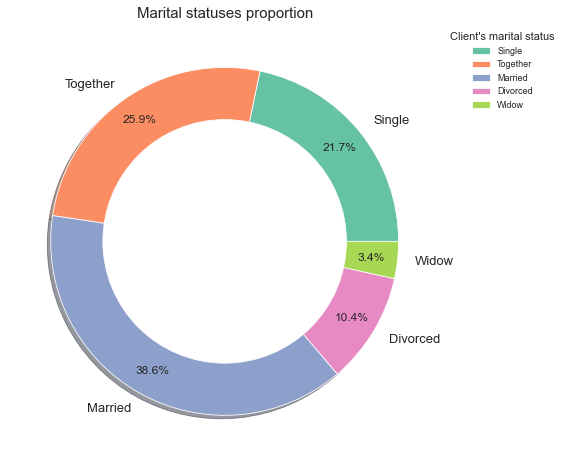

In [303]:
unique_column_labels = data['Marital_Status'].unique()
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data.loc[data['Marital_Status'] == label].shape[0])

plt.figure(figsize=(12, 8))
plt.title("Marital statuses proportion")
plt.pie(sizes, labels=unique_column_labels, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Client's marital status", labels=unique_column_labels, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

I have an idea to combine the statuses [`Single`, `Widow`, `Divorced` ] and [`Together`, `Married`], because the client, as a consumer, is better described not by a specific status, but by the presence of a partner

In [317]:
data['Has_Partner'] = data["Marital_Status"].replace({'Single': 'No', 
                                                      'Widow': 'No',
                                                      'Divorced': 'No',
                                                      'Together': 'Yes',
                                                      'Married': 'Yes'})

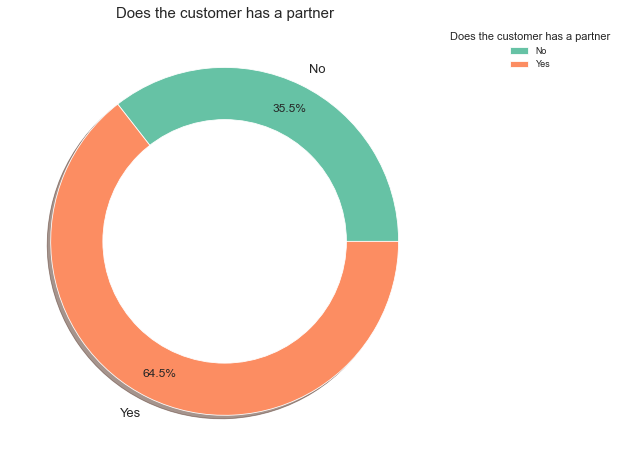

In [486]:
unique_column_labels = data['Has_Partner'].unique()
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data.loc[data['Has_Partner'] == label].shape[0])

plt.figure(figsize=(12, 8))
plt.title("Does the customer has a partner")
plt.pie(sizes, labels=unique_column_labels, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Does the customer has a partner", labels=unique_column_labels, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

## Kidhome and Teenhome

In [319]:
data['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [320]:
data['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

I think the full number of children in the client's household can help us to better interpret the result of clustering

I would also introduce feature `HasChildren` which is 1, if number of children is not zero

In [331]:
data['NumChildren'] = data['Kidhome'] + data['Teenhome']
data['HasChildren'] = (data['NumChildren'] >= 1).astype('int64')

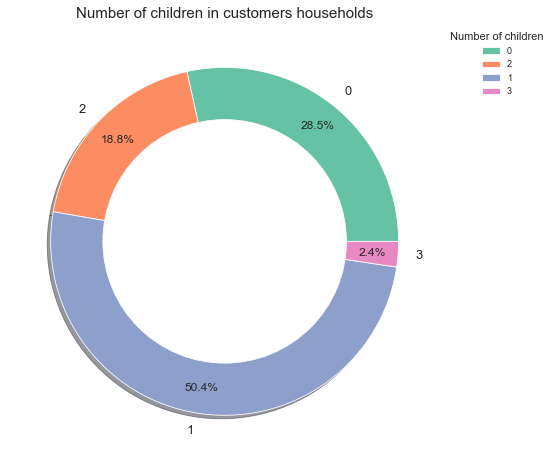

In [332]:
unique_column_labels = data['NumChildren'].unique()
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data.loc[data['NumChildren'] == label].shape[0])

plt.figure(figsize=(12, 8))
plt.title("Number of children in customers households")
plt.pie(sizes, labels=unique_column_labels, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Number of children", labels=unique_column_labels, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

We see that the most customers have 1 child

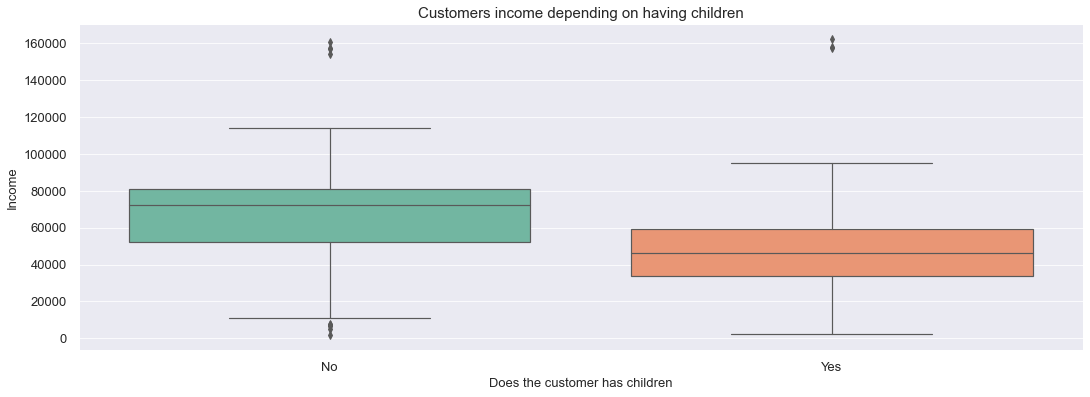

In [350]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data.query('Income < 500000'), x='HasChildren', y='Income', palette=PALETTE)
plt.title('Customers income depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

Customers without children have bigger income

## Amount spent

In [420]:
mnt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)

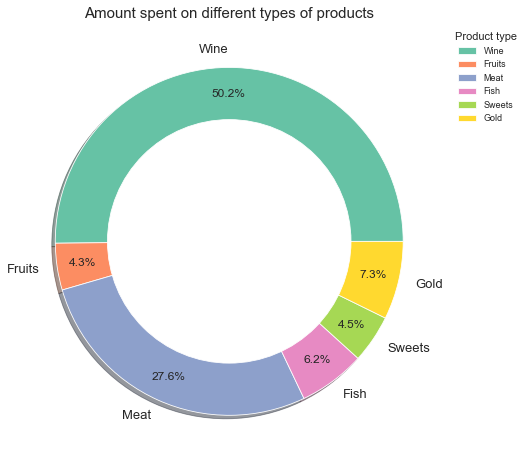

In [432]:
unique_column_labels = data.filter(like='Mnt').columns
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data[label].sum())

plt.figure(figsize=(12, 8))
plt.title("Amount spent on different types of products")
plt.pie(sizes, labels=['Wine', 'Fruits', 'Meat',
                       'Fish', 'Sweets', 'Gold'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Product type", labels=['Wine', 'Fruits', 'Meat',
                                                    'Fish', 'Sweets', 'Gold'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

It seems like the Wine is the most popular product among customers

`Wines` and `Meat` products are the most spent on

Let's introduce `MntTotal` feature, which is the total amount spent in the last 2 years

In [433]:
data['MntTotal'] = data.filter(like='Mnt').sum(axis=1)

Now let's check the total amount spent depending on education degrees and number of children

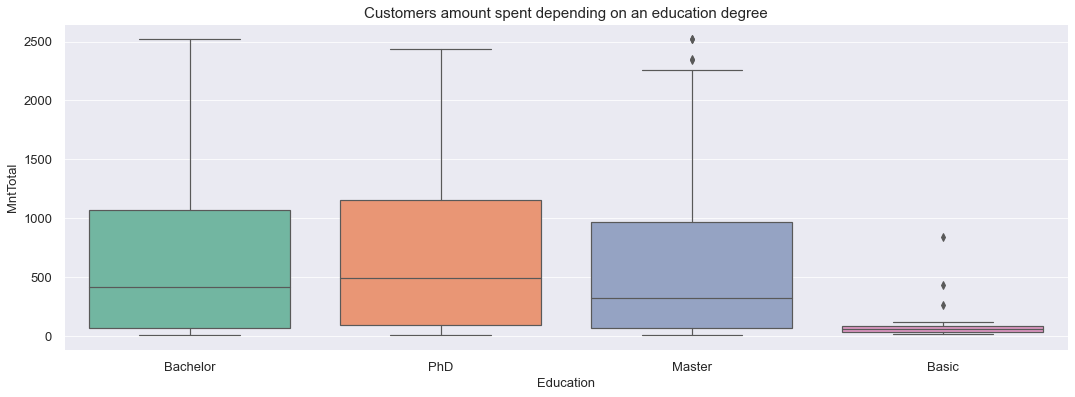

In [434]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='Education', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on an education degree')

plt.show()

Customers with PhD degree spent the most amount in last 2 years, customers with Basic degree - the least amount. That corresponds to `Income` distribution

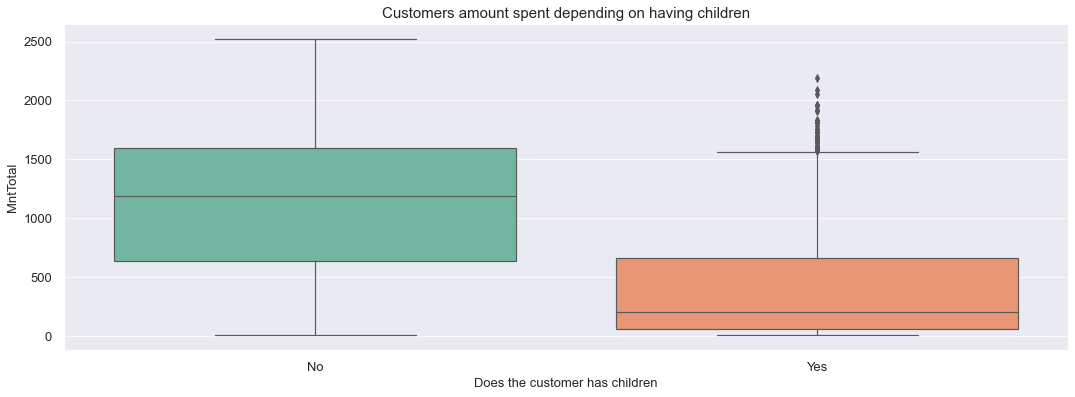

In [352]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data, x='HasChildren', y='MntTotal', palette=PALETTE)
plt.title('Customers amount spent depending on having children')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Does the customer has children')

plt.show()

And the amount spent by parents and not parents differs a lot

## Number of purchases

In [444]:
data.filter(regex='Num[^Deals].+Purchases').columns

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], dtype='object')

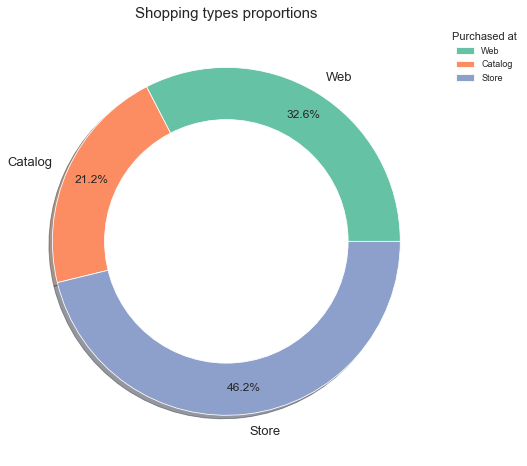

In [448]:
unique_column_labels = data.filter(regex='Num[^Deals].+Purchases').columns
sizes = []

for i, label in enumerate(unique_column_labels):
    sizes.append(data[label].sum())

plt.figure(figsize=(12, 8))
plt.title("Shopping types proportions")
plt.pie(sizes, labels=['Web', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=PALETTE)
plt.legend(title="Purchased at", labels=['Web', 'Catalog', 'Store'], bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Store purchases are the most popular

There is interesting insight that customers with `Basic` education degree have more website visits than others:

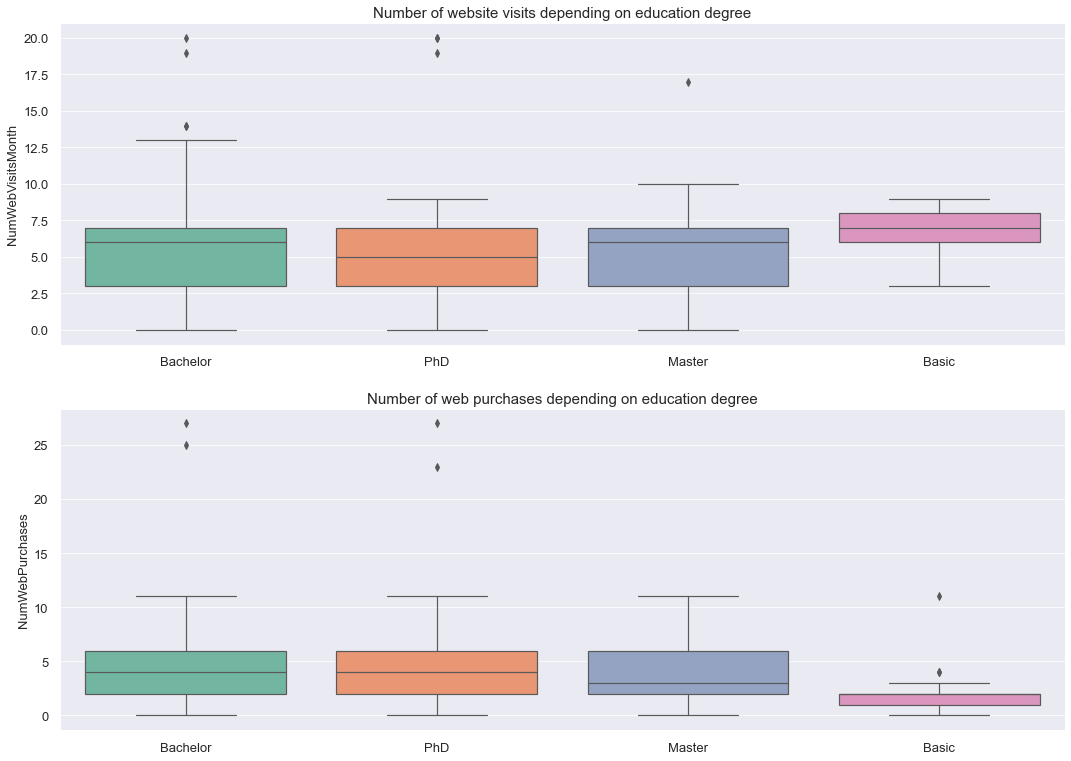

In [493]:
fig, axes= plt.subplots(2, 1, figsize=(18, 13))

sns.boxplot(data=data, x='Education', y='NumWebVisitsMonth', palette=PALETTE, ax=axes[0])
axes[0].set_title('Number of website visits depending on education degree')
axes[0].set_xlabel('')

sns.boxplot(data=data, x='Education', y='NumWebPurchases', palette=PALETTE, ax=axes[1])
axes[1].set_title('Number of web purchases depending on education degree')
axes[1].set_xlabel('')

plt.show()

Despite that, they do not buy more on the websites. The might just monitoring the deals. So the store could publish more deals on the site to force them buy more

Same thing with customers, that have children:

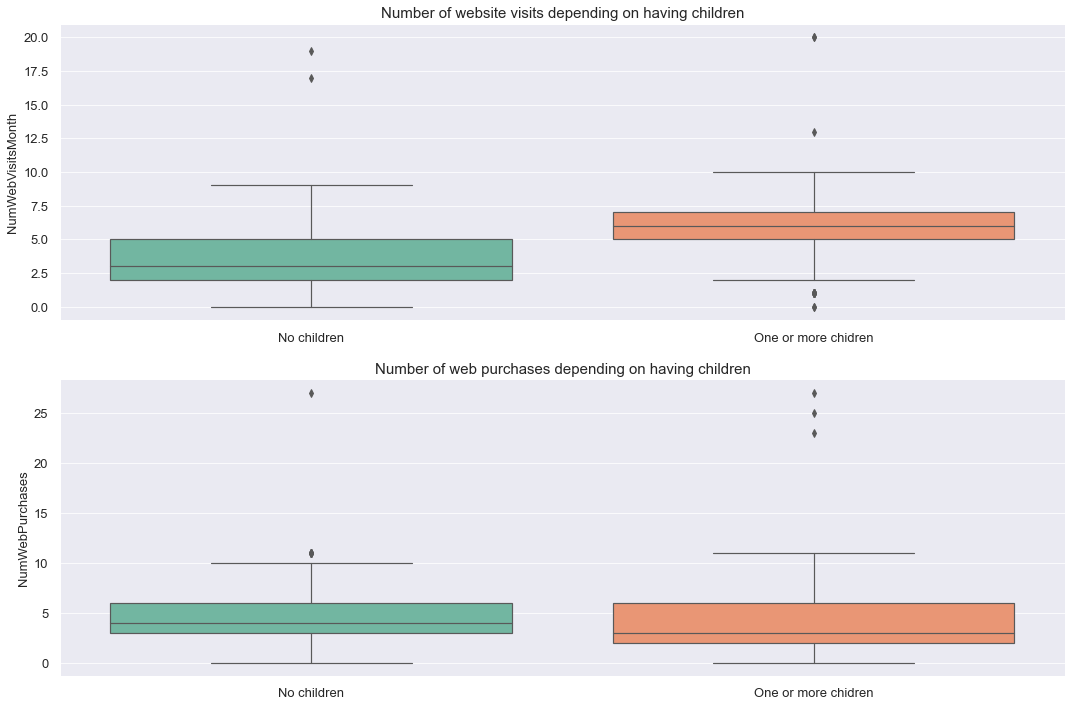

In [506]:
fig, axes= plt.subplots(2, 1, figsize=(18, 12))

sns.boxplot(data=data, x='HasChildren', y='NumWebVisitsMonth', palette=PALETTE, ax=axes[0])
axes[0].set_title('Number of website visits depending on having children')
axes[0].set_xlabel('')
axes[0].set_xticklabels(['No children', 'One or more chidren'])

sns.boxplot(data=data, x='HasChildren', y='NumWebPurchases', palette=PALETTE, ax=axes[1])
axes[1].set_title('Number of web purchases depending on having children')
axes[1].set_xlabel('')
axes[1].set_xticklabels(['No children', 'One or more chidren'])

plt.show()

In [491]:
data['NumTotalPurchases'] = data.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

The feature `NumTotalPurchases` is the sum of all purchases made by a customer

In [503]:
data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)]

,Age,Customer_For,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Has_Partner,NumChildren,HasChildren,MntTotal,NumTotalPurchases
ID,,,,,,,,,,,,,,,,,,,,,
5555,39,158,Bachelor,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,No,0,0,6,0.0
3955,49,168,Bachelor,Divorced,4861.0,0,0,20,2,1,...,0,0,0,0,0,No,0,0,6,0.0
6862,43,203,Bachelor,Divorced,1730.0,0,0,65,1,1,...,0,0,0,0,0,No,0,0,8,0.0
11110,41,603,Bachelor,Single,3502.0,1,0,56,2,1,...,0,0,0,0,0,No,1,1,5,0.0
9931,51,167,PhD,Married,4023.0,1,1,29,5,0,...,0,0,0,0,0,Yes,2,1,9,0.0
11181,65,465,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,Yes,0,0,8,0.0


There are 6 customers with 0 purchases, but total amount spent is not 0. Seems like incorrectly collected data, let's delete these rows.

In [507]:
data.drop(data.loc[(data['NumTotalPurchases'] == 0) & (data['MntTotal'] != 0)].index, inplace=True)

And i would also add `AvgPurchaseFrequency` feature, that indicates how active the customer is (customers doing a purchase every `AvgPurchaseFrequency` days)

In [512]:
data['AvgPurchaseFrequency'] = data['Customer_For'] / data['NumTotalPurchases']

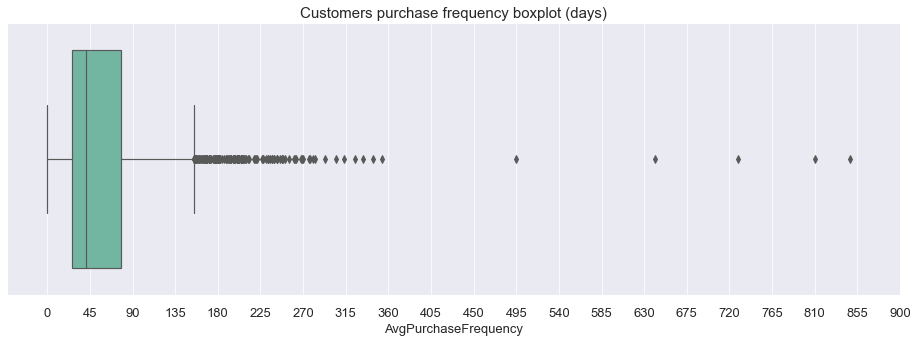

In [530]:
plt.figure(figsize=(16,5))
plt.title(f'Customers purchase frequency boxplot (days)')
ax = sns.boxplot(data['AvgPurchaseFrequency'], palette=PALETTE)
plt.xticks(np.linspace(0, 900, 21, dtype=int))
plt.show()

In [537]:
data['AvgCheck'] = data['MntTotal'] / data['NumTotalPurchases']

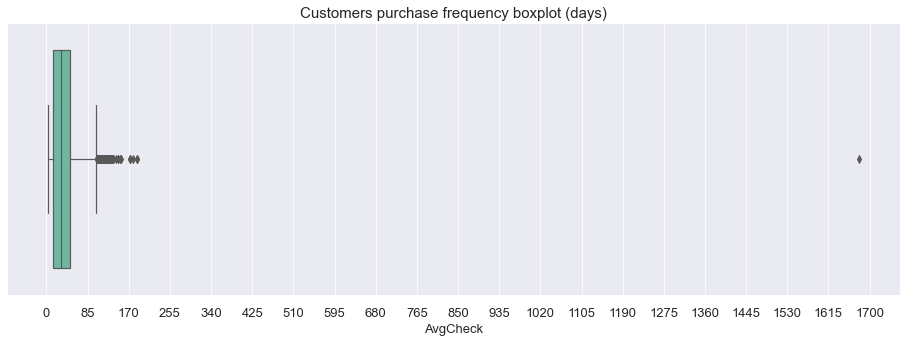

In [544]:
plt.figure(figsize=(16,5))
plt.title(f'Customers purchase frequency boxplot (days)')
ax = sns.boxplot(data['AvgCheck'], palette=PALETTE)
plt.xticks(np.linspace(0, 1700, 21, dtype=int))
plt.show()

## Accepted campaigns

TODO: Stacked plots for total accepted campaign by education degree

In [531]:
data['AcceptedTotal'] = data.filter(regex='Accepted|Response').sum(axis=1)

<AxesSubplot:xlabel='AcceptedTotal', ylabel='count'>

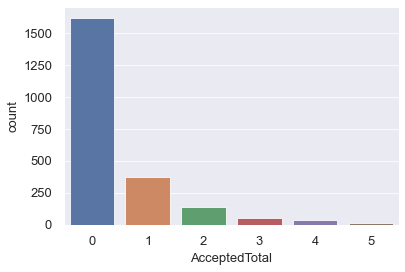

In [532]:
sns.countplot(data['AcceptedTotal'])

In [55]:
data['AcceptedTotal'].value_counts()

0    1622
1     369
2     142
3      51
4      36
5      10
Name: AcceptedTotal, dtype: int64

In [56]:
data['HasEverAccepted'] = (data['AcceptedTotal'] != 0).astype('int64')

<AxesSubplot:xlabel='HasEverAccepted', ylabel='count'>

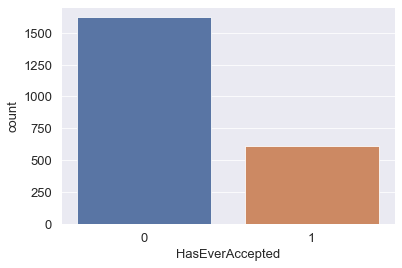

In [57]:
sns.countplot(data['HasEverAccepted'])

## Multivariate analysis

In [774]:
NUMERICAL_FEATURES = ['Age', 'Income', 'NumChildren', 'Customer_For', 
                      'Recency', 'MntWines', 'MntTotal', 
                      'NumTotalPurchases', 'AcceptedTotal']

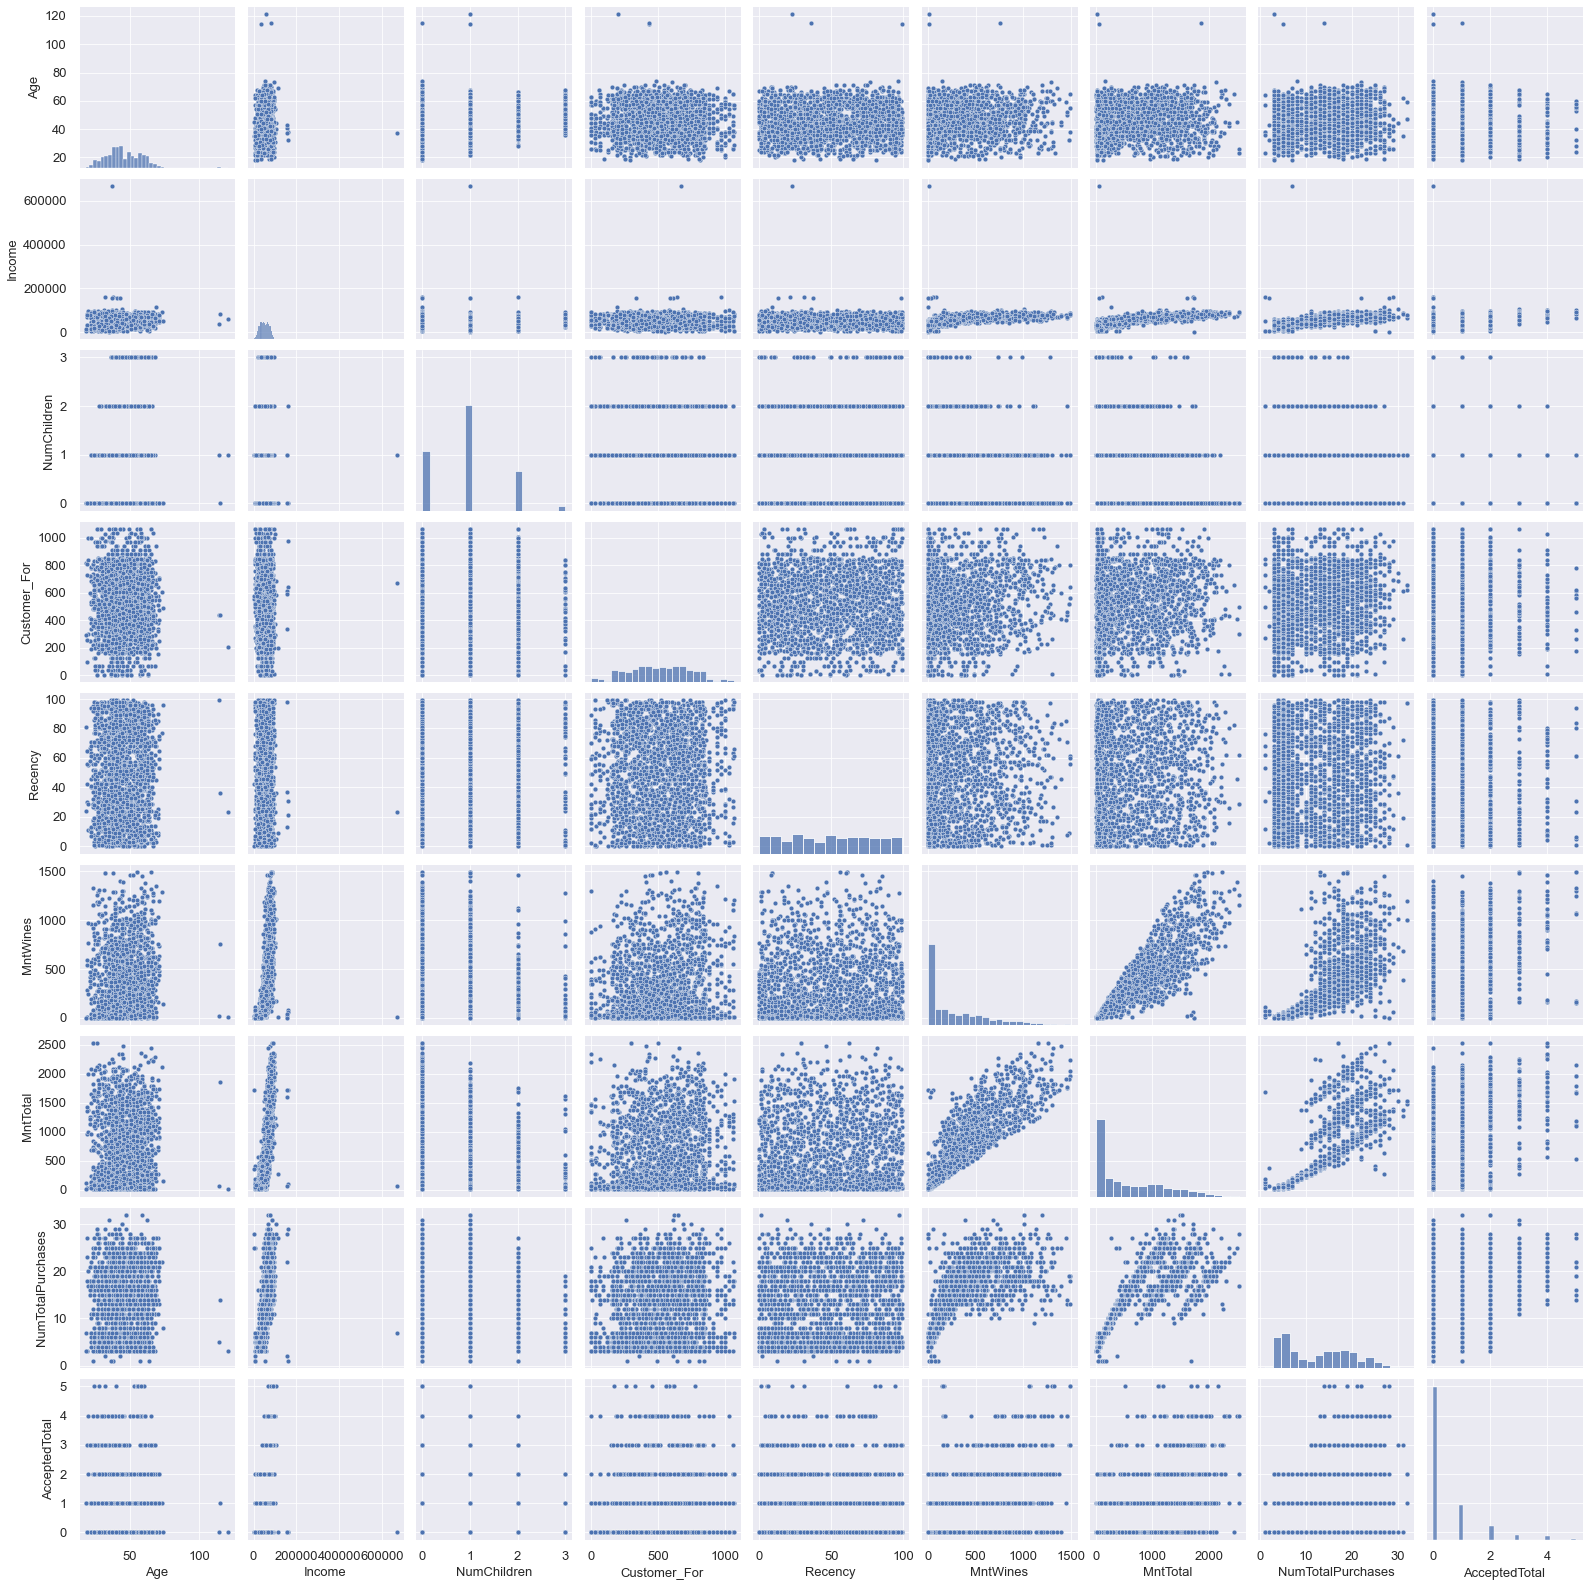

In [775]:
sns.pairplot(data=data[NUMERICAL_FEATURES], 
             kind='scatter')
plt.show()

## EDA Result

TBD

# Data Cleaning

In [609]:
data_cleaned = data.drop(data[(data['Income'] > 600000) |
                              (data['Age'] > 100) |
                              (data['AvgPurchaseFrequency'] > 450) |
                              (data['AvgCheck'] > 1500)].index)

In [610]:
data_cleaned

,Age,Customer_For,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Response,Has_Partner,NumChildren,HasChildren,MntTotal,NumTotalPurchases,AvgPurchaseFrequency,AcceptedTotal,AvgCheck
ID,,,,,,,,,,,,,,,,,,,,,
5524,57,972,Bachelor,Single,58138.0,0,0,58,635,88,...,0,1,No,0,0,1617,22.0,44.181818,1,73.500000
2174,60,126,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,No,2,1,27,4.0,31.500000,0,6.750000
4141,49,473,Bachelor,Together,71613.0,0,0,26,426,49,...,0,0,Yes,0,0,776,20.0,23.650000,0,38.800000
6182,30,66,Bachelor,Together,26646.0,1,0,26,11,4,...,0,0,Yes,1,1,53,6.0,11.000000,0,8.833333
5324,33,322,PhD,Married,58293.0,1,0,94,173,43,...,0,0,Yes,1,1,422,14.0,23.000000,0,30.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,47,542,Bachelor,Married,61223.0,0,1,46,709,43,...,0,0,Yes,1,1,1341,16.0,33.875000,0,83.812500
4001,68,62,PhD,Together,64014.0,2,1,56,406,0,...,0,0,Yes,3,1,444,15.0,4.133333,1,29.600000
7270,33,316,Bachelor,Divorced,56981.0,0,0,91,908,48,...,0,0,No,0,0,1241,18.0,17.555556,1,68.944444


# Data preprocessing

## Binary encoding

## Ordinal encoding

In [772]:
# NOT USED

In [60]:
education_encoder = OrdinalEncoder(categories=[['Basic', 'Bachelor', 'Master', 'PhD']])
data['Education'] = education_encoder.fit_transform(data['Education'].values.reshape(-1,1))[:, 0]

## One Hot Encoder

In [773]:
# NOT USED

In [62]:
marital_status_encoder = OneHotEncoder(sparse=False)
transformed = marital_status_encoder.fit_transform(data['Marital_Status'].values.reshape(-1,1))
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=marital_status_encoder.get_feature_names())
ohe_df.index = data.index
#concat with original data
data = pd.concat([data, ohe_df], axis=1).drop(columns='Marital_Status')

## Feature Selection

In [754]:
FEATURES = ['Income', 'MntTotal', 'Customer_For', 'AvgCheck']

## Feature scaling

In [755]:
quantile_scaler = gen_features(
    columns = [[c] for c in FEATURES],
    classes=[{'class': StandardScaler}]
)

In [756]:
scaling_mapper = DataFrameMapper(quantile_scaler, default=None, df_out=True)
data_cleaned_scaled = scaling_mapper.fit_transform(data_cleaned)
data_scaled = scaling_mapper.transform(data)

In [757]:
data_cleaned_scaled

,Income,MntTotal,Customer_For,AvgCheck,Age,Education,Marital_Status,Kidhome,Teenhome,Recency,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Has_Partner,NumChildren,HasChildren,NumTotalPurchases,AvgPurchaseFrequency,AcceptedTotal
ID,,,,,,,,,,,,,,,,,,,,,
5524,0.295141,1.677147,1.975935,1.215207,57,Bachelor,Single,0,0,58,...,0,0,0,1,No,0,0,22.0,44.181818,1
2174,-0.268124,-0.965744,-1.668693,-1.027344,60,Bachelor,Single,1,1,38,...,0,0,0,0,No,2,1,4.0,31.5,0
4141,0.938689,0.279241,-0.173792,0.049417,49,Bachelor,Together,0,0,26,...,0,0,0,0,Yes,0,0,20.0,23.65,0
6182,-1.208874,-0.922527,-1.927177,-0.957352,30,Bachelor,Together,1,0,26,...,0,0,0,0,Yes,1,1,6.0,11.0,0
5324,0.302544,-0.309177,-0.824311,-0.241431,33,PhD,Married,1,0,94,...,0,0,0,0,Yes,1,1,14.0,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,0.442477,1.218381,0.123464,1.561669,47,Bachelor,Married,0,1,46,...,0,0,0,0,Yes,1,1,16.0,33.875,0
4001,0.575771,-0.272608,-1.944409,-0.259669,68,PhD,Together,2,1,56,...,1,0,0,0,Yes,3,1,15.0,4.133333,1
7270,0.239884,1.052161,-0.850160,1.062157,33,Bachelor,Divorced,0,0,91,...,0,0,0,0,No,0,0,18.0,17.555556,1


# Clustering

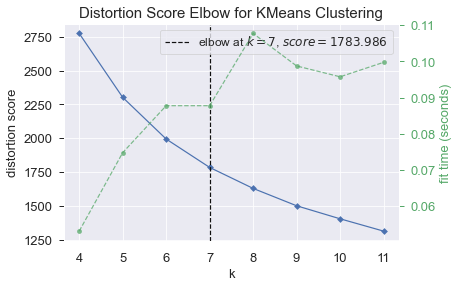

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [758]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(data_cleaned_scaled[FEATURES])        # Fit the data to the visualizer
visualizer.show()

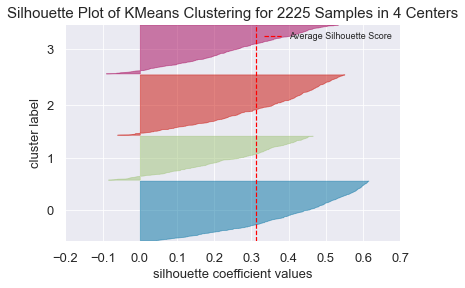

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2225 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [759]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_cleaned_scaled[FEATURES])        # Fit the data to the visualizer
visualizer.show() 

In [761]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(data_cleaned_scaled[FEATURES])

pred=kmeans.predict(data_cleaned_scaled[FEATURES])

data_clustered = data_cleaned.copy()
data_clustered['Cluster'] = pred + 1

In [783]:
fig = px.scatter_3d(data_clustered, x="Income", y="AvgCheck", z="Customer_For", color='Cluster', width=800, height=800)
fig.show()


# PCA

In [779]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_cleaned_scaled[FEATURES])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_df["Cluster"] = pred + 1

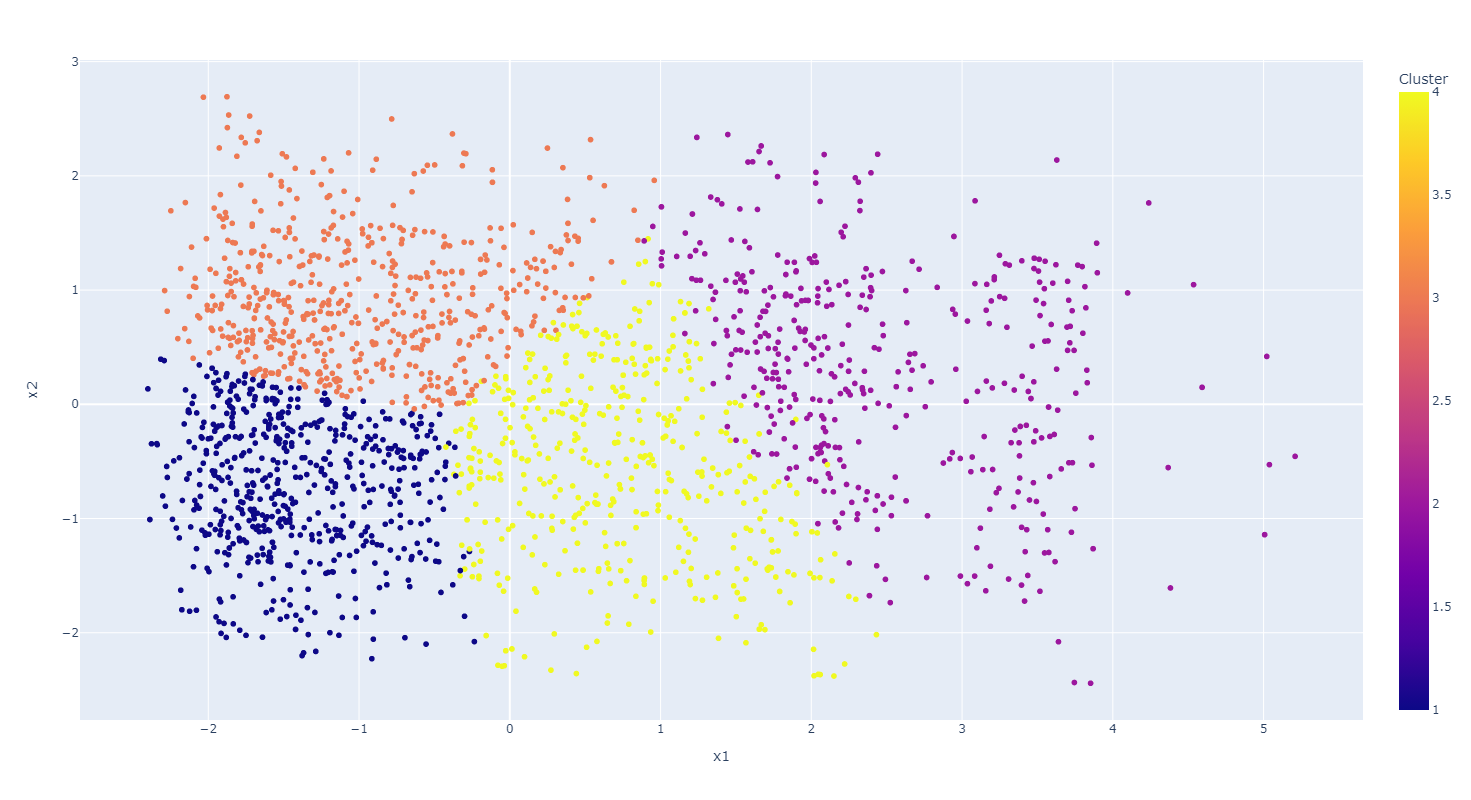

In [780]:
fig = px.scatter(pca_df, x="x1", y="x2", color='Cluster', width=800, height=800)
fig.show()

In [781]:
pca.explained_variance_ratio_

array([0.66912866, 0.25234625])

In [782]:
pca.explained_variance_ratio_.sum()

0.9214749073443307